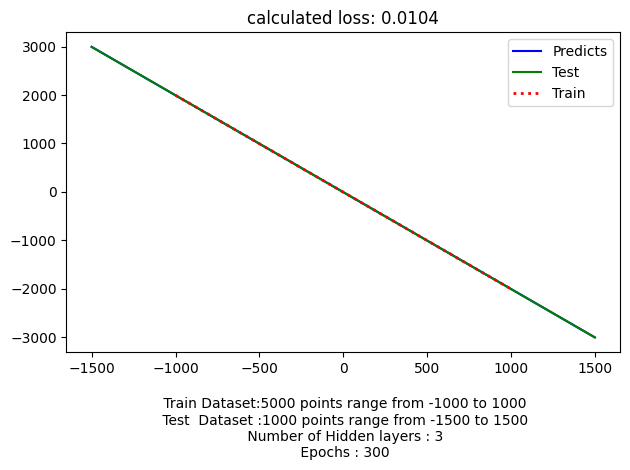

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

def correct_input_output(num_of_points, min, max):
    x_train = np.linspace(min, max, num=num_of_points).reshape(-1, 1)
    z = [-2*i-5 for i in x_train]
    y_train = np.array(z).reshape(-1, 1)
    return x_train, y_train

def loss(our_answer, correct_Answer):
    l = len(our_answer)
    sum = 0
    for i in range(0, l):
        sum += (our_answer[i]-correct_Answer[i])**2
    return sum/l


def Run(hidden_layer, num_of_iteration, train_info, test_info):
    x_train, y_train = correct_input_output(
        train_info[0], train_info[1], train_info[2])
    x_test, y_test = correct_input_output(
        test_info[0], test_info[1], test_info[2])
    x_input, y_input = correct_input_output(
        num_of_points=train_info[0], min=train_info[1], max=train_info[2])
    train_network = MLPRegressor(hidden_layer_sizes=hidden_layer,
                           max_iter=num_of_iteration,
                           random_state=0, shuffle=True).fit(x_input, y_input.ravel())

    predictions = train_network.predict(x_test)

    fig, ax = plt.subplots()
    test_plt,  = plt.plot(x_test, predictions, color='b', label='Predicts')
    expected_plt,  = plt.plot(
        x_test, y_test, color='g', label='Test')
    train_plt, = plt.plot(x_train, y_train, color='r',
                          label='Train', linestyle=':', linewidth=2)

    l = len(y_test)
    sum = 0
    for i in range(0, l):
        sum += (y_test[i]-predictions[i])**2
    loss_value = sum/l
    plt.title('calculated loss: ' + str(round(loss_value[0], 4)))
    ax.set_xlabel('\n Train Dataset:'+str(train_info[0]) + ' points range from ' + str(train_info[1]) + ' to '+str(train_info[2]) +
                  '\n Test  Dataset :'+str(test_info[0]) + ' points range from ' + str(test_info[1]) + ' to '+str(test_info[2]) +
                  '\n Number of Hidden layers : '+str(len(hidden_layer)) +
                  '\n Epochs : '+str(num_of_iteration))

    plt.legend()
    plt.tight_layout()
    plt.show()


# For number of hidden layer
# Run((10,), 3000, (300, -100, 100), (600, -300, 300))
# Run((10,10),3000,(300,-100,100),(600,-300,300))
# Run((10, 10, 10), 3000, (300, -100, 100), (600, -300, 300))


# # for train range
# Run((30,20,10),3000,(200,-100,100),(600,-300,300))
# Run((30,20,10),3000,(200,-150,150),(600,-300,300))
# Run((30,20,10),3000,(200,-200,200),(600,-300,300))

# # for test range
# Run((1000,),2000,(200,-200,200),(600,-300,300))
# Run((1000,),2000,(200,-200,200),(600,-400,400))
# Run((1000,),2000,(200,-200,200),(600,-500,500))

# # for train dataset
# Run((30,20,10),2000,(150,-100,100),(600,-300,300))
# Run((30,20,10),2000,(200,-100,100),(600,-300,300))
# Run((30,20,10),2000,(250,-100,100),(600,-300,300))

# # for test point
# Run((1000,),2000,(200,-200,200),(500,-400,400))
# Run((1000,),2000,(200,-200,200),(600,-400,400))
# Run((1000,),2000,(200,-200,200),(700,-400,400))

# # number of iteration
# Run((30,20,10),100,(200,-100,100),(600,-300,300))
# Run((30,20,10),2000,(200,-100,100),(600,-300,300))
# Run((30,20,10),2500,(200,-100,100),(600,-300,300))

# number of neurons
# Run((10,10,5),2500,(200,-100,100),(600,-300,300))
# Run((20,15,10),2500,(200,-100,100),(600,-300,300))
# Run((30,20,10),2500,(200,-100,100),(600,-300,300))

# the most optimal way found by me
Run((30,20,10),300,(5000,-1000,1000),(1000,-1500,1500))
